In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
INPUT_DIR = '../input/Financial'

In [3]:
files = os.listdir(INPUT_DIR)
files

['test_data.csv', 'test_data_hidden.csv', 'train_data.csv']

In [4]:
input_files = {}
for file in files:
    if 'train' in file:
        input_files['train_data'] = INPUT_DIR + '/' + file
    elif 'hidden' in file:
        input_files['test_hidden'] = INPUT_DIR + '/' + file
    else:
        input_files['test_data'] = INPUT_DIR + '/' + file
input_files

{'test_data': '../input/Financial/test_data.csv',
 'test_hidden': '../input/Financial/test_data_hidden.csv',
 'train_data': '../input/Financial/train_data.csv'}

In [5]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
train_df = reduce_mem_usage(pd.read_csv(input_files['train_data']))
train_df.head()

Mem. usage decreased to 13.69 Mb (74.6% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043945,0.318604,1.045898,2.806641,-0.561035,-0.367920,0.032745,-0.042328,-0.322754,...,-0.240112,-0.680176,0.085327,0.684570,0.318604,-0.204956,0.001661,0.037903,49.65625,0
1,22555.0,-1.665039,0.808594,1.805664,1.903320,-0.821777,0.934570,-0.824707,0.976074,1.747070,...,-0.335449,-0.511230,0.035828,0.147583,-0.529297,-0.566895,-0.596191,-0.220093,16.93750,0
2,2431.0,-0.323975,0.602051,0.865234,-2.138672,0.294678,-1.251953,1.072266,-0.334961,1.071289,...,0.012222,0.352783,-0.341553,-0.145752,0.094177,-0.804199,0.229370,-0.021622,1.00000,0
3,86773.0,-0.258301,1.217773,-0.585449,-0.875488,1.222656,-0.311035,1.074219,-0.161377,0.200684,...,-0.424561,-0.781250,0.019318,0.178589,-0.315674,0.096680,0.269775,-0.020630,10.78125,0
4,127202.0,2.142578,-0.494873,-1.936523,-0.818359,-0.025208,-1.027344,-0.151611,-0.305664,-0.869629,...,0.010117,0.021729,0.079468,-0.480957,0.023849,-0.279053,-0.030121,-0.043884,39.96875,0


In [7]:
test_df = reduce_mem_usage(pd.read_csv(input_files['test_data']))
test_df.head()

Mem. usage decreased to  3.37 Mb (74.2% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.042725,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,0.926270,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.408203,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,-0.199219,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.059875,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000


In [8]:
test_hidden_df = reduce_mem_usage(pd.read_csv(input_files['test_hidden']))
test_hidden_df.head()

Mem. usage decreased to  3.42 Mb (74.6% reduction)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137,0
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000,0
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500,0
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375,0
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000,0


In [9]:
display(train_df.head())
display(test_df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043945,0.318604,1.045898,2.806641,-0.561035,-0.367920,0.032745,-0.042328,-0.322754,...,-0.240112,-0.680176,0.085327,0.684570,0.318604,-0.204956,0.001661,0.037903,49.65625,0
1,22555.0,-1.665039,0.808594,1.805664,1.903320,-0.821777,0.934570,-0.824707,0.976074,1.747070,...,-0.335449,-0.511230,0.035828,0.147583,-0.529297,-0.566895,-0.596191,-0.220093,16.93750,0
2,2431.0,-0.323975,0.602051,0.865234,-2.138672,0.294678,-1.251953,1.072266,-0.334961,1.071289,...,0.012222,0.352783,-0.341553,-0.145752,0.094177,-0.804199,0.229370,-0.021622,1.00000,0
3,86773.0,-0.258301,1.217773,-0.585449,-0.875488,1.222656,-0.311035,1.074219,-0.161377,0.200684,...,-0.424561,-0.781250,0.019318,0.178589,-0.315674,0.096680,0.269775,-0.020630,10.78125,0
4,127202.0,2.142578,-0.494873,-1.936523,-0.818359,-0.025208,-1.027344,-0.151611,-0.305664,-0.869629,...,0.010117,0.021729,0.079468,-0.480957,0.023849,-0.279053,-0.030121,-0.043884,39.96875,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,113050.0,0.114685,0.796387,-0.149536,-0.823242,0.878906,-0.553223,0.939453,-0.108521,0.111145,...,-0.042725,-0.335693,-0.807617,-0.055939,-1.025391,-0.369629,0.204712,0.242676,0.085693,0.890137
1,26667.0,-0.039307,0.495850,-0.811035,0.546875,1.986328,4.386719,-1.344727,-1.744141,-0.562988,...,0.926270,-1.376953,-0.072205,-0.197632,1.014648,1.011719,-0.167725,0.113159,0.256836,85.000000
2,159519.0,2.275391,-1.531250,-1.021484,-1.602539,-1.220703,-0.462402,-1.196289,-0.147095,-0.950195,...,-0.408203,-0.193237,-0.103516,0.151001,-0.811035,-0.197876,-0.128418,0.014198,-0.051300,42.687500
3,137545.0,1.940430,-0.357666,-1.210938,0.382568,0.050812,-0.171265,-0.109131,-0.002115,0.869141,...,-0.199219,0.157959,0.650391,0.034210,0.739746,0.223633,-0.195557,-0.012794,-0.056854,29.984375
4,63369.0,1.081055,-0.502441,1.076172,-0.543457,-1.472656,-1.065430,-0.443115,-0.143433,1.660156,...,0.059875,0.224121,0.821289,-0.137207,0.986328,0.562988,-0.574219,0.089661,0.052032,68.000000


In [10]:
train_view = train_df[['Class']]
display(train_view)

,Class
0,0
1,0
2,0
3,0
4,0
...,...
227840,0
227841,0
227842,0
227843,0


In [11]:
train_df = train_df.drop(columns=['Class'])

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(init='random', verbose=1)

In [14]:
train_df_tsne = tsne.fit_transform(train_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 227845 samples in 0.761s...
[t-SNE] Computed neighbors for 227845 samples in 14.679s...
[t-SNE] Computed conditional probabilities for sample 1000 / 227845
[t-SNE] Computed conditional probabilities for sample 2000 / 227845
[t-SNE] Computed conditional probabilities for sample 3000 / 227845
[t-SNE] Computed conditional probabilities for sample 4000 / 227845
[t-SNE] Computed conditional probabilities for sample 5000 / 227845
[t-SNE] Computed conditional probabilities for sample 6000 / 227845
[t-SNE] Computed conditional probabilities for sample 7000 / 227845
[t-SNE] Computed conditional probabilities for sample 8000 / 227845
[t-SNE] Computed conditional probabilities for sample 9000 / 227845
[t-SNE] Computed conditional probabilities for sample 10000 / 227845
[t-SNE] Computed conditional probabilities for sample 11000 / 227845
[t-SNE] Computed conditional probabilities for sample 12000 / 227845
[t-SNE] Computed conditional probab

In [15]:
display(train_df_tsne)

array([[-22.65618  ,  -1.0080575],
       [ 12.689291 , -10.165368 ],
       [  9.857085 ,   6.451673 ],
       ...,
       [-13.122165 ,   1.3304235],
       [ -2.1906579,  14.22826  ],
       [  9.192067 , -26.688526 ]], dtype=float32)

array([[ 5.6391223e+04, -4.1787567e+01],
       [ 7.2201953e+04, -8.7577286e+01],
       [ 9.2323273e+04, -8.8199684e+01],
       ...,
       [-6.9114352e+04,  6.6068561e+02],
       [-2.7820422e+04,  1.6870497e+03],
       [ 5.1311879e+04,  8.8936630e+01]], dtype=float32)

In [16]:
train_view['tsne_0'] = train_df_tsne[:, 0]
train_view['tsne_1'] = train_df_tsne[:, 1]
display(train_view.head())

,Class,tsne_0,tsne_1,tsne_pca_0,tsen_pca_1
0,0,-22.656179,-1.008057,56391.222656,-41.787567
1,0,12.689291,-10.165368,72201.953125,-87.577286
2,0,9.857085,6.451673,92323.273438,-88.199684
3,0,21.034235,-17.394426,7979.369141,-73.215591
4,0,-4.319123,8.079747,-32449.541016,-46.972424


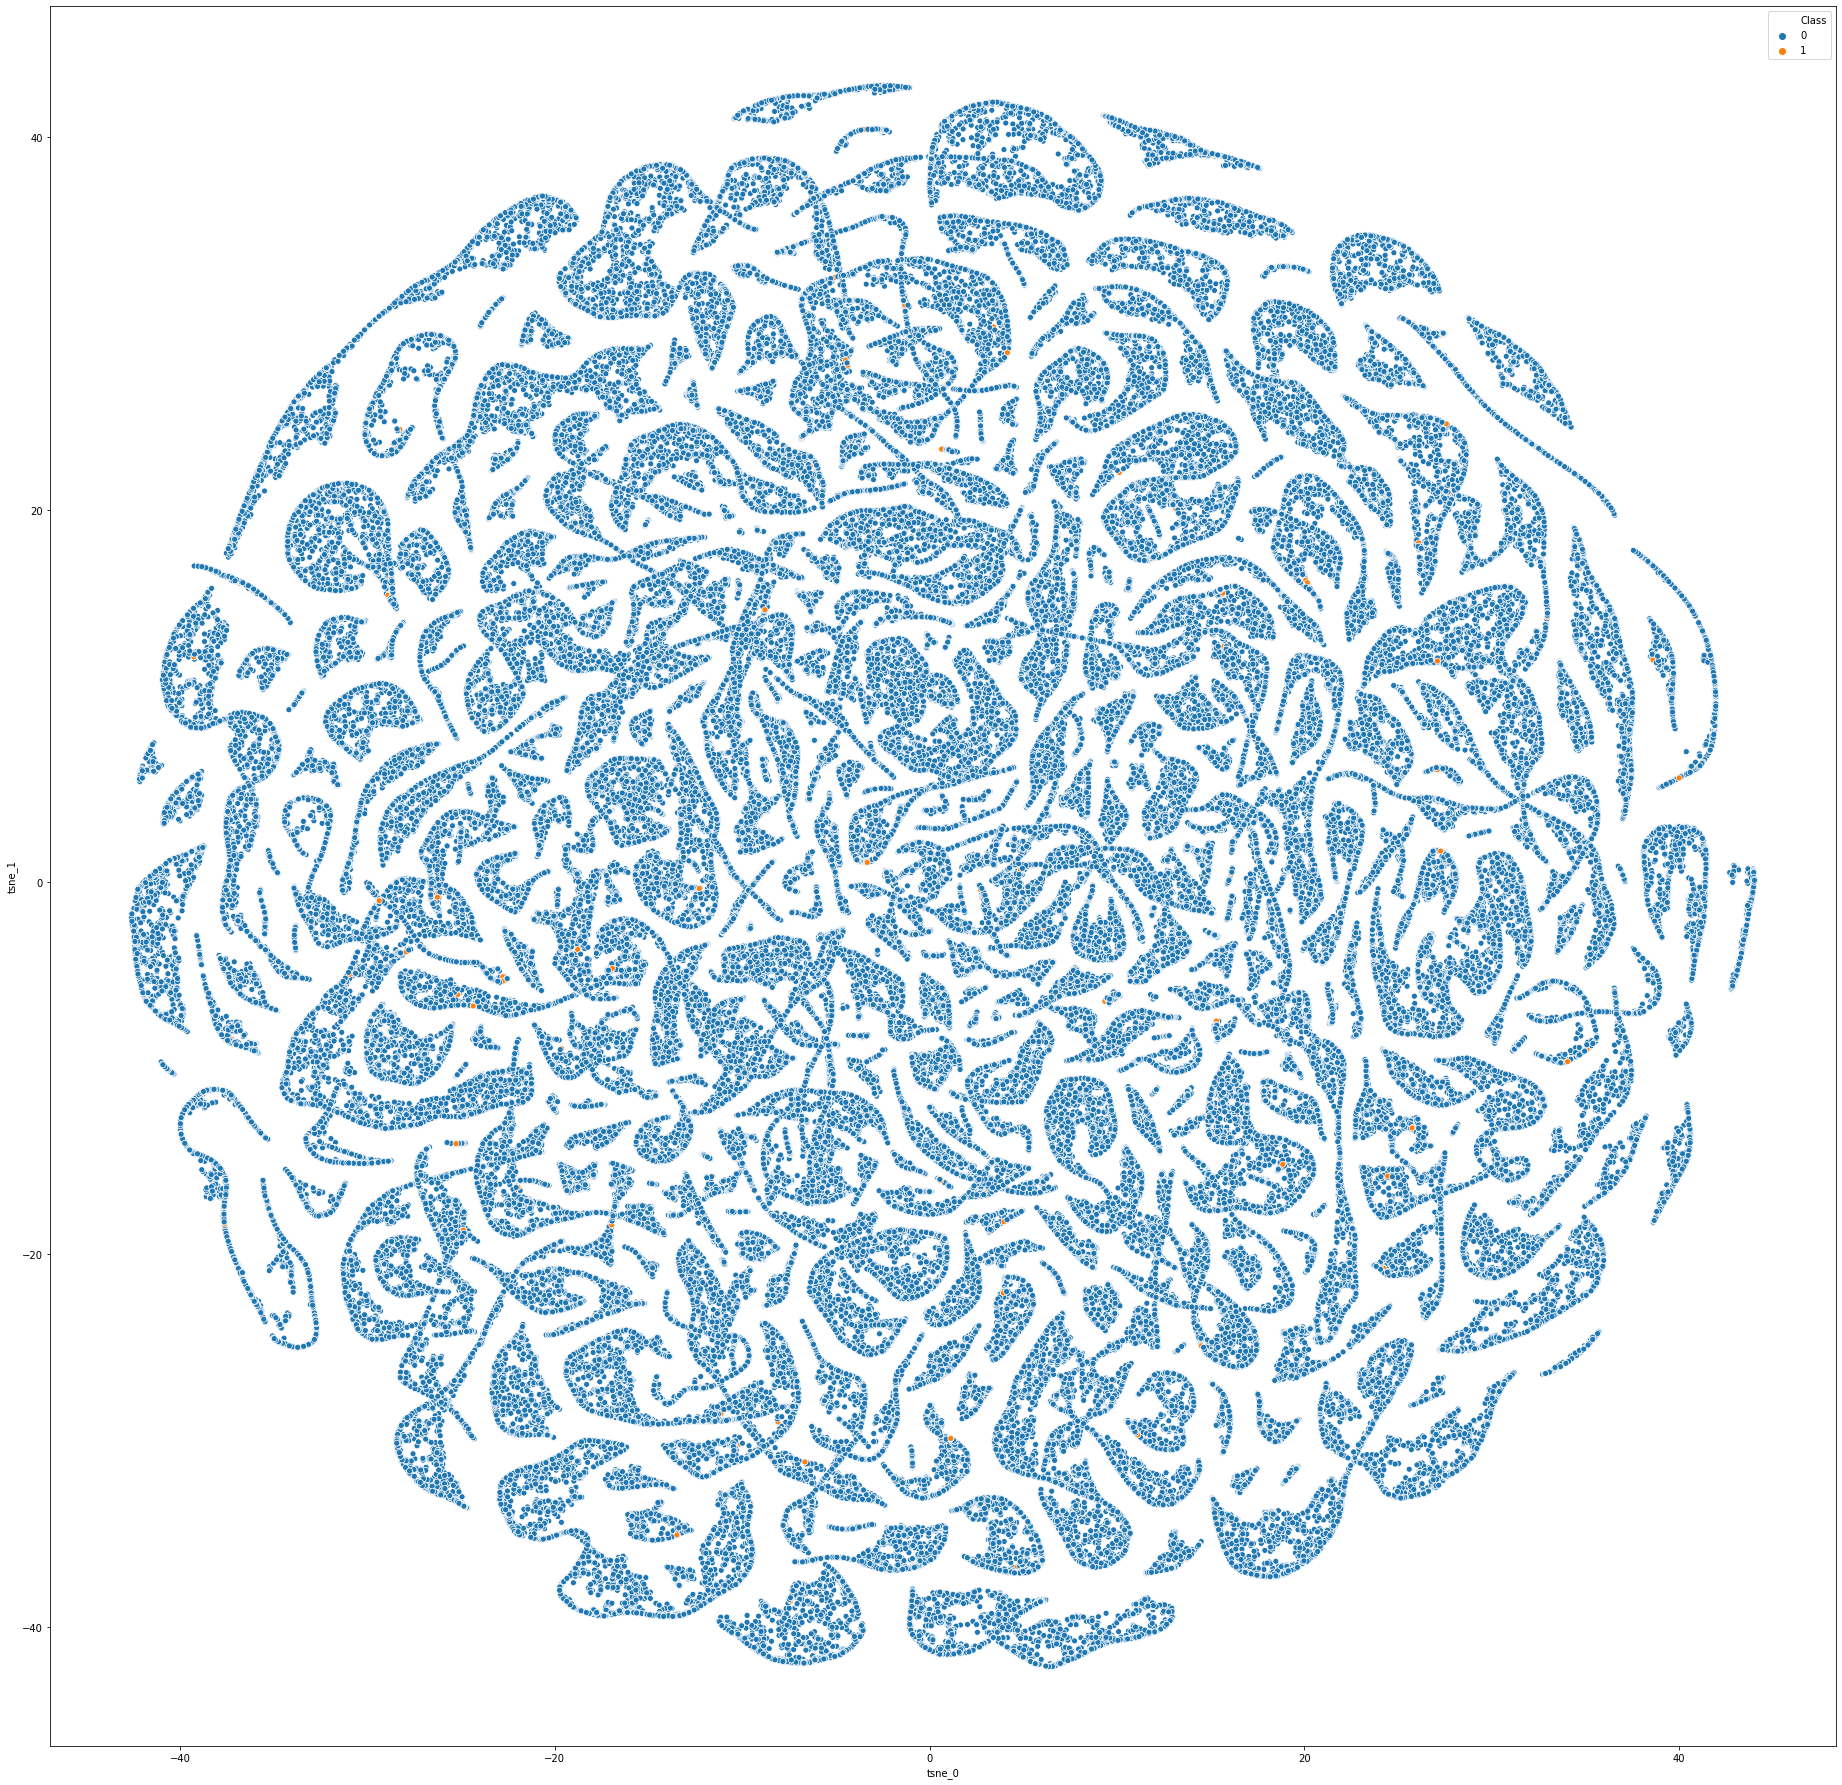

In [17]:
plt.figure(figsize=(32, 32))
sns_plot = sns.scatterplot(x='tsne_0', y='tsne_1', hue='Class', data=train_view)
fig = sns_plot.get_figure()
fig.savefig("./dump/output-eda-tsne.png")
display(sns_plot)